<a href="https://colab.research.google.com/github/AbdulWahabRaza123/ML/blob/main/03_neural_network_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Types of Classification

1. Binary Classification
2. Multiclass Classification
3. Multilabel classification

In [3]:
import tensorflow as tf
#creating data
from sklearn.datasets import make_circles
#Making 1000 examples of data
n_samples=1000
#creating circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42
                 )

In [4]:
#Checking out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [5]:
#checking the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is too hard to understand now so let's visualize it firstly...

In [6]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


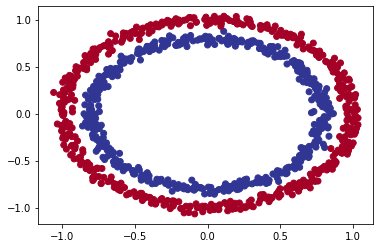

In [7]:
#Now, visualize it by plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

##Input and Output shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

In [10]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

##Creating Model with those steps which we are doing from last hundred times

In [11]:
#setting random seed
tf.random.set_seed(42)
#creating model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)
#compiling model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
#fitting model
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [12]:
#out model is 48% accurate lets try to increase accuracy by train it for longer
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

##Now our accuracy is 50% so lets improve it by adding extra layer

In [13]:
#setting seed
tf.random.set_seed(42)
#creating model
model_1=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
     tf.keras.layers.Dense(1)
    ]
)
#compiling model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)
#fitting model
model_1.fit(X,y,epochs=200,verbose=0)

In [14]:
#evaluating model 1
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999393463135, 0.5]

##Model not improvinde
so we will follow these steps
1. Add any extra layer or hidden units (neurons)
2. change or add activation function in the layer
3. change the optimizer such as from SGD to Adam
4. train model for longer time

In [15]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential(
    [
    tf.keras.layers.Dense(10,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=["accuracy"]
)
history=model_2.fit(X,y,epochs=200,verbose=0)

In [16]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9980


[0.020827995613217354, 0.9980000257492065]

##For Prediction

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):
  #define the axis boundaries of plot and create a meshgrid
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy=np.meshgrid(
      np.linspace(x_min,x_max,100),
      np.linspace(y_min,y_max,100)
  )
  #create X value(we are going to make predictions)
  x_in=np.c_[xx.ravel(),yy.ravel()]
  #Making predictions
  y_pred=model.predict(x_in)
  #checking for multiclass
  if len(y_pred[0])>1:
    print("This is multiclass classification")
    #reshapping predictions to get ready for plotting
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("This is Binary classification")
    y_pred=np.round(y_pred).reshape(xx.shape)
  #plot the decision
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)
  plt.ylim(yy.min(),yy.max())


This is Binary classification


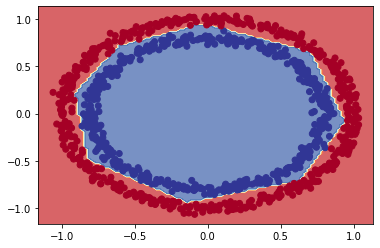

In [19]:
#This data is non linear
plot_decision_boundary(model=model_2,X=X,y=y)

❗ **Question:** What's wrong with the prediction. Are we evaluation matrix correctly? **Hind** What is the data model learn on and what is the data model predict on?

**Note:** Compination of linear data is streight line and non linear is non straight line in neural network.

let's see linear and non linear function (relu +sigmoid) in code.

In [20]:
#Create a toy a tensor (similar to the data which we have pass into our model)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

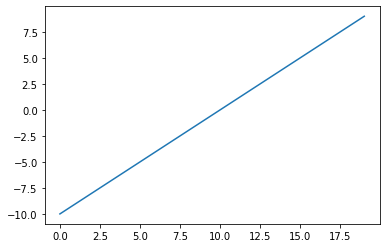

In [21]:
#Visualize our toy tensor
plt.plot(A)

In [22]:
#Let's start making sigmoid function
def Sigmoid(x):
  return 1/(1+tf.exp(-x))

#Now let's try sigmoid on data
Sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

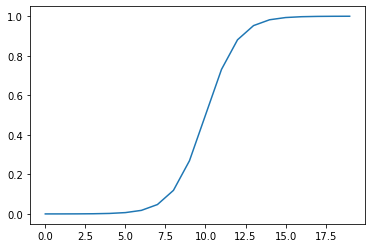

In [23]:
#Now let's check the result of sigmoid function on data
plt.plot(Sigmoid(A))

In [24]:
#Now let's try the same thing with relu function
def relu(x):
  return tf.maximum(0,x)

#Now let's try relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

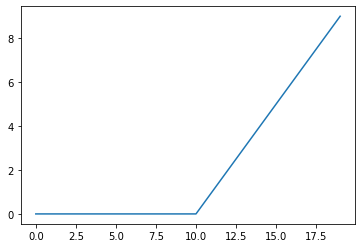

In [25]:
#Now we will test the shape of data aftre applying relu
plt.plot(relu(A))

In [26]:
#Now let's try the linear activation function (This will give us unmodified output)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

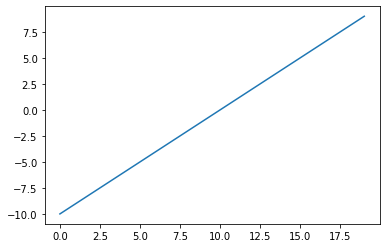

In [27]:
#Now let's try to plot the graph
plt.plot(tf.keras.activations.linear(A))

In [28]:
#Does A is even changed?
tf.keras.activations.linear(A)==A #A has not change as you can see here it is unmodified

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and Improving our classification

let's train and test the model again....

In [29]:
#Checking how many examples we have 
len(X)

1000

In [30]:
len(y)

1000

In [31]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[:200],y[:200]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [32]:
#let's create model to fit on trainning data and evaluate on test data
#setting random seed
tf.random.set_seed(42)
#creating model
model_2=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid"),
    ]
)
#compiling model
model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)
history=model_2.fit(X_train,y_train,epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [33]:
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9900


[0.12723897397518158, 0.9900000095367432]

This is Binary classification
This is Binary classification


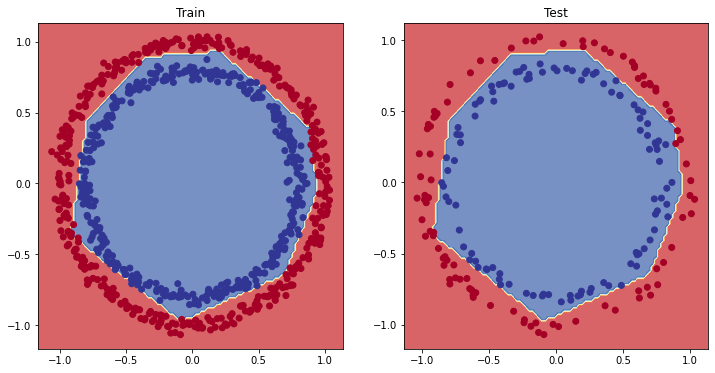

In [34]:
#plotting dcision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X=X_test,y=y_test)

###PLotting Trainning (Loss) Curve

In [35]:
#Converting history to dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_2 Loss Curves')

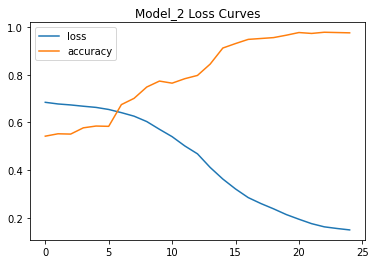

In [36]:
#plotting the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_2 Loss Curves")

##Finding the Best Learning Rate

To find the ideal learning rate (with the help of it loss decrease with trainning). we will use following steps:
* A Learning rate **callback** -you can think callback as extra functionality you can add to your model while trainning
* Another Model
* A modified Loss curves plot 

In [37]:
#Creating Another Model
tf.random.set_seed(42)
model_3=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
model_3.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)
#Creating a callback learning rate
#with the help of it learning rate will also improve with iterations
# here starting learning rate will be 1e-4 but it will increase 1e-4*10**(epochs/20) with every epoch
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4*10**(epochs/20))
#Fitting the model
history_3=model_3.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

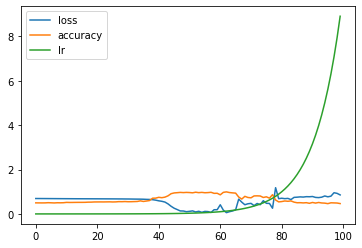

In [38]:
#Now plotting this history
pd.DataFrame(history_3.history).plot()


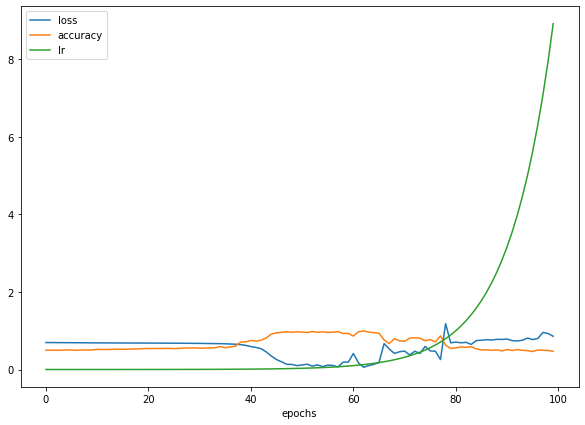

In [39]:
#we can also use this in this way
pd.DataFrame(history_3.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

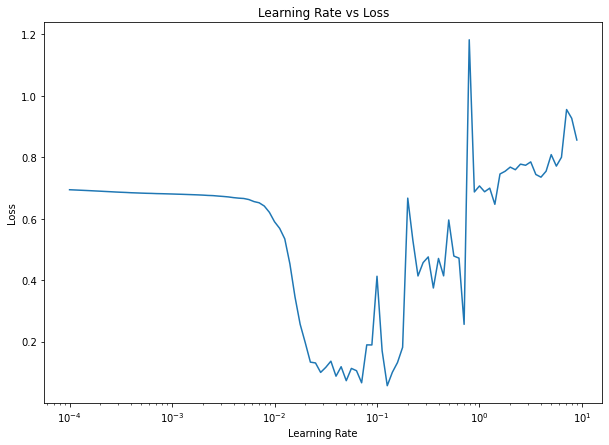

In [40]:
#plotting learning rate vs loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [41]:
#As you can as ideal learning rate is 0.01 in the graph because lowest loss point is at 10**-1

In [42]:
#Lets. try the ideal learning rate with the same model as below
#set random seed
tf.random.set_seed(42)
model_4=tf.keras.Sequential(
    [
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(4,activation="relu"),
      tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
model_4.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.02),
    metrics=["accuracy"]
)
history_4=model_4.fit(X_train,y_train,epochs=28)

Epoch 1/28


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/28
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/28
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/28
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/28
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/28
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/28
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/28
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/28
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/28
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/28
25/25 [===========

In [43]:
#Evaluating model_4
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9950


[0.03588251769542694, 0.9950000047683716]

In [44]:
#evaluating model_3
model_2.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9900


[0.12723897397518158, 0.9900000095367432]

This is Binary classification
This is Binary classification


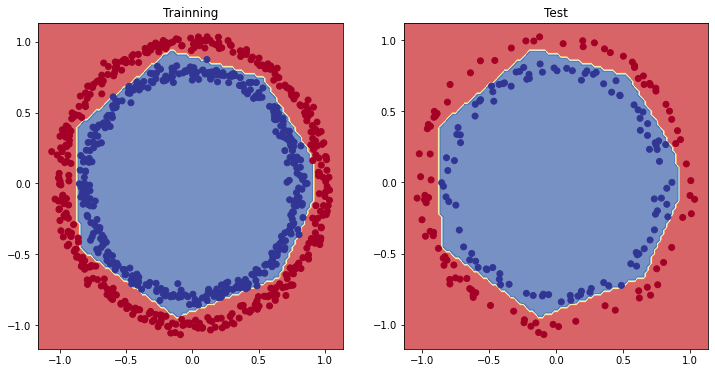

In [45]:
#Plotting Decision Boundaries for train and test set in model_4
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Trainning")
plot_decision_boundary(model_4,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X=X_test,y=y_test)

##More Classification evaluation Methods

Other than visualization we have some classification methods for evaluation
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion Metrics
* Classification Report SKLearn

In [46]:
#Finding Loss and Accuracy
loss,accuracy=model_4.evaluate(X_test,y_test)
print(f"Loss is {loss} on test dataset")
print(f"Accuracy is {(accuracy*100):.2f}% on test dataset")

7/7 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9950
Loss is 0.03588251769542694 on test dataset
Accuracy is 99.50% on test dataset


##Working with Confusion Metrics

In [48]:
#confusion metrics
from sklearn.metrics import confusion_matrix
#predicted values
y_preds=model_4.predict(X_test)

#creating confusion metrics
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [49]:
y_test[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [50]:
y_preds[:10]

array([[0.99987435],
       [0.99417496],
       [0.92244565],
       [0.95553446],
       [0.00113982],
       [0.7130963 ],
       [0.9845351 ],
       [0.9999814 ],
       [0.994764  ],
       [0.01499113]], dtype=float32)

###There is an issue because our test value is in binary form and our predicted values are in contineous form therefore error is showing

to solve this problem by converting predictions to binary format

In [51]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [52]:
#confusion metrics
from sklearn.metrics import confusion_matrix
#predicted values
y_preds=model_4.predict(X_test)

#creating confusion metrics
confusion_matrix(y_test, tf.round(y_preds))

array([[ 96,   0],
       [  1, 103]])

lets pretify our confusion metrics

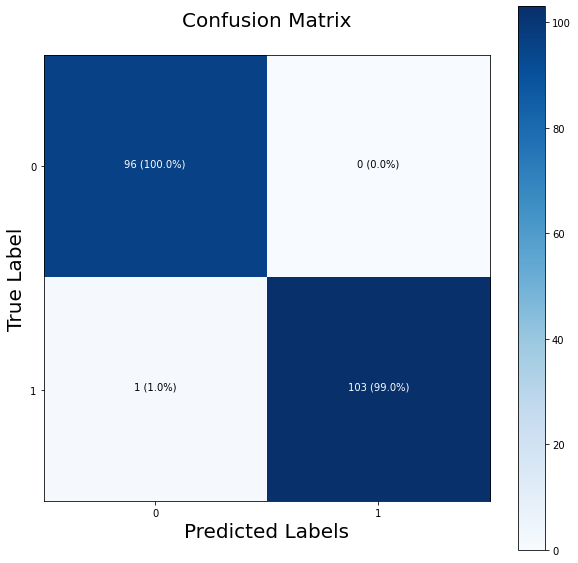

In [53]:
import itertools
figsize=(10,10)
cm=confusion_matrix(y_test,tf.round(y_preds))
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize our confusion metrics
n_classes=cm.shape[0]

#lets prettify it
fig,ax=plt.subplots(figsize=figsize)
#create metrix plot
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes=False

if(classes):
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#Label the axis
ax.set(title="Confusion Matrix",
       xlabel="Predicted Labels",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )
#set x-axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#set threashold for different colors
threashold=(cm.max()+cm.min())/2

#plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",horizontalalignment="center",color="white" if cm[i,j]>threashold else "black")


##Working with Multiclass classification a lager example

when you have more than two classification then it is known as multiclass classification

**Note:** To practice multiclass classification we will work with different items of clothing in neural network (fashion_mnist)

In [55]:
#let's start
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
#Good thing is dataset is already split into test and train sets
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [56]:
#Showing First Trainning example
print(f"Trainning example:\n {train_data[0]}\n")
print(f"Trainning label:\n {train_labels[0]}\n")

Trainning example:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   

In [57]:
#Now showing shape of single example
train_data[0].shape,train_labels[0].shape
#Train Label is scaler so it has no shape

((28, 28), ())

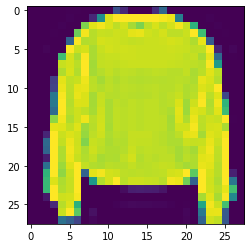

In [58]:
#ploting single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [59]:
train_labels[0]

9

In [60]:
#create a small list and make it human readable by index our trainning label
#getting all the classes/labels 
classes=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(classes)

10

Text(0.5, 1.0, 'Pullover')

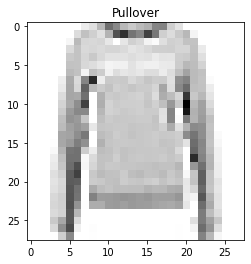

In [61]:
#Now plotting sample image
index_of_choice=400
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)#cmap is using to make it into binary
plt.title(classes[train_labels[index_of_choice]])

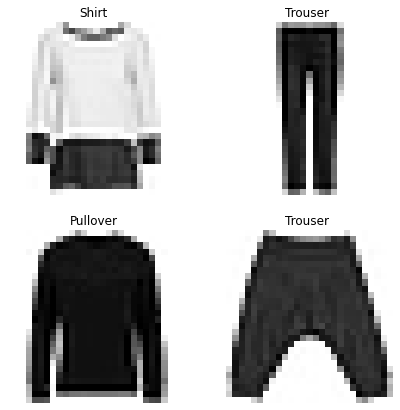

In [62]:
#plotting multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False) #to remove the boxes or axis from images

##Builing a muliclass classification model

Here we will use the same architecture as Binary Classification Problem but we will change these following things

* Input shape=28x28 (shape of one image)
* Output shape=10 (one per class of clothing)
* Loss Function=tf.keras.losses.CategoricalCrossentropy() if labels are hot encoded otherwise use tf.keras.losses.SparseCategoricalCrossentropy()
* Output activation will be softmax (not sigmoid)


In [63]:
#setting random seed
tf.random.set_seed(42)

#creating model
model_5=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
    ]
)
#compiling model
model_5.compile(
    # loss=tf.keras.losses.SparseCategoricalCrossentropy(),#if you did not change your labe into one_hot encoding
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#fitting model
non_norm_history=model_5.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [64]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 4)                 3140      
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Now lets find the min and max values from data
train_data.min(),train_data.max()

(0, 255)

Neural Network Prefers data to be scaler(or normalize form)

In [66]:
#we can get the trainning and testing data between 0 and 1 by dividing with maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

#Now let's check the min and max data
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [67]:
#Now we will put the normalize data instead of original data in the model
#setting seed
tf.random.set_seed(42)
#creating model
model_6=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
)
#compiling model
model_6.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#fitting model
norm_history=model_6.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

As you can see neural network works better with normalize data. It gave me 2 time more accuracy with normalize/scaller data

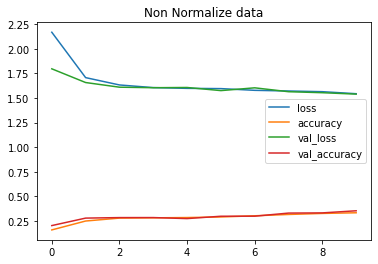

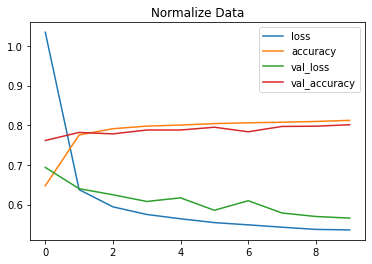

In [68]:
import pandas as pd
#Non Normalize Loss Curve
pd.DataFrame(non_norm_history.history).plot(title="Non Normalize data")
#Normalize Loss Curve
pd.DataFrame(norm_history.history).plot(title="Normalize Data")

##Now Finding Ideal Learning Rate to increase the acuracy

In [69]:
#setting random seed
tf.random.set_seed(42)
#creating model
model_7=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
)
#compiling model
model_7.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
#Adding callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs:1e-3*10**(epochs/20))
#fitting model
find_lr_history=model_7.fit(train_data_norm,train_labels,epochs=40, validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Finding the Ideal Learning Rate')

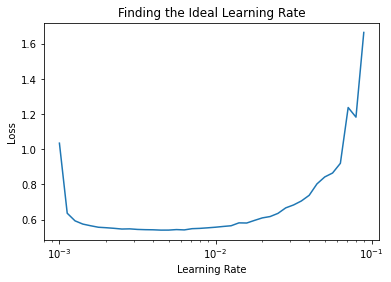

In [70]:
#Now lets get the best Learning rate
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the Ideal Learning Rate")

In [71]:
(10**-2)

0.01

In [72]:
#Now I am using my ideal learning rate
#setting random seed
tf.random.set_seed(42)
#making model
model_8=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
)
#compiling model
model_8.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history_8=model_8.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=20,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Ep

#Evaluating Multiclass Classification

* we can use classification matrix to evaluate the performance such as confusion matrix
* We can also check some of th perdictions by visualization
* WE can improve the model by trainning longer or changing the structure
* Save and export it for use in application 

Let's start with top 2

In [73]:
y_pred=model_8.predict(test_data_norm)
y_pred[:10]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09],
       [7.30094826e-03, 9.60110366e-01, 7.54836719e-06, 3.13696042e-02,
   

**Note:** You can predict that data which your model is trainned if your model is trained in normalize data then you can predict data with normalize data if it is trained on other data then prediction will also based on other data 

In [76]:
y_pred[0],tf.argmax(y_pred[0]),classes(tf.argmax(y_pred[0]))

TypeError: ignored

In [ ]:
#converting predictions into integrers
y_pred_int=y_pred.argmax(axis=1)
#view first 10 prediction
y_pred_int[:10]

Making a fun function which will
* plot the random images
* Make an prediction on said image
* Label the plot with truth table & the prediction label

In [92]:
def plot_random_image(model, images,truth_labels,classes):
  #setting up random number
  i=random.randint(0,len(images))
  #creating prediction and target
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[truth_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  if(pred_label==true_label):
    color="green"
  else:
    color="red"
  
  plt.xlabel("pred: {} {:2.0f}% (True: {})" .format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
             color=color)

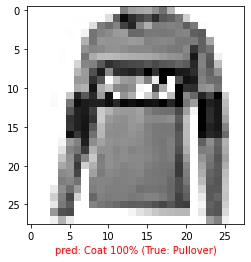

In [95]:
#Checking the Random Image prediction
plot_random_image(model=model_8,images=test_data,truth_labels=test_labels,classes=classes)